In [36]:
%load_ext autoreload
%autoreload 2
from data import *
from visualisation2 import *
import numpy as np
from image_processing import *
# from analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


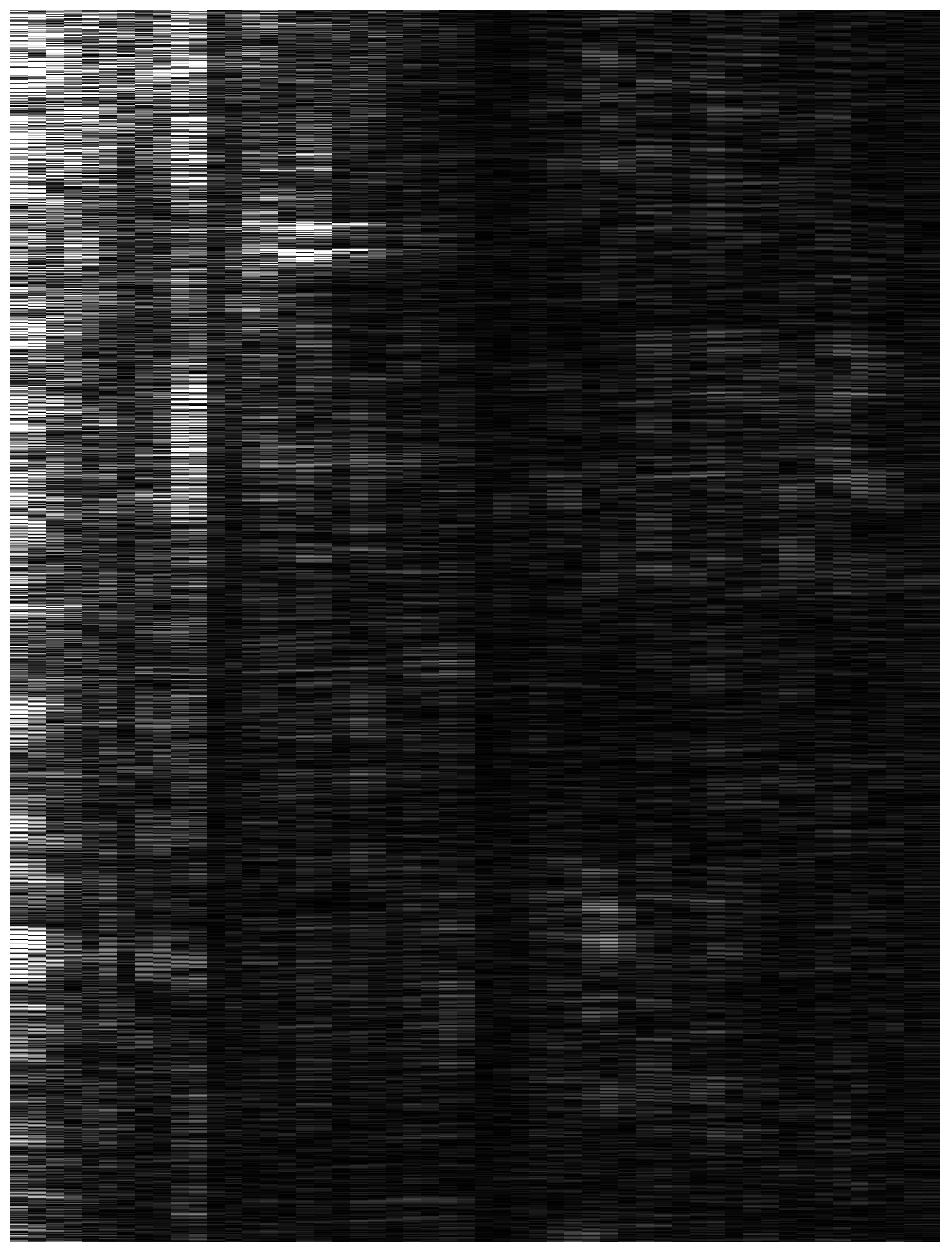

In [37]:
filename = "091832.npy"

data = load_from_file(filename)
# plot_timeframe(data)

img = data.to_numpy()

img = prepocess(img)
original_img = img.copy()

plot_numpy(img)


In [38]:
img_i = pipeline_processing(img)

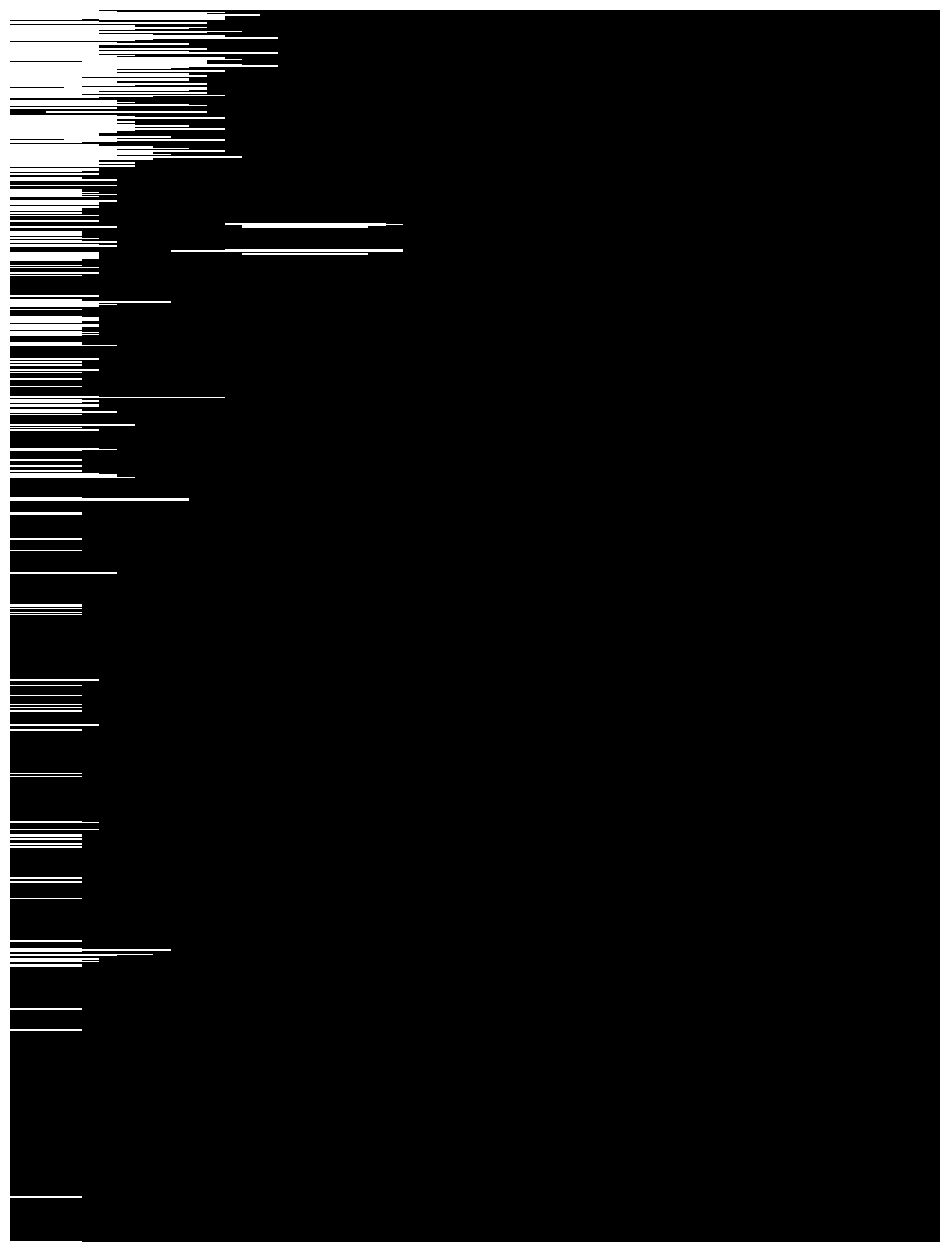

In [39]:
plot_numpy(img_i)

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

X = np.nonzero(img)
X = np.vstack(X).T

X.shape
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
clustering = DBSCAN(eps=0.08, min_samples=300).fit(X_scaled)

no_of_clusters = np.max(clustering.labels_)+1
print(no_of_clusters)


: 

In [34]:
print(no_of_clusters)

2


In [35]:
colors = generate_colors(no_of_clusters) 
img_clusters = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

print("Number of clusters: ", no_of_clusters)
for cluster_id in range(no_of_clusters):
    idx = X[clustering.labels_ == cluster_id, :]
    # print(idx)
    # print(f"Cluster{cluster_id}: {np.sum(idx)} members")
    img_clusters[idx.T[0], idx.T[1],:] = colors[cluster_id]

plot_numpy(img_clusters)

Number of clusters:  2


NameError: name 'X' is not defined

In [11]:
print(max(img.flatten()))

255


In [18]:
tr, img_i = cv2.threshold(img, 0, 255, 70)

In [19]:
tr

0.0

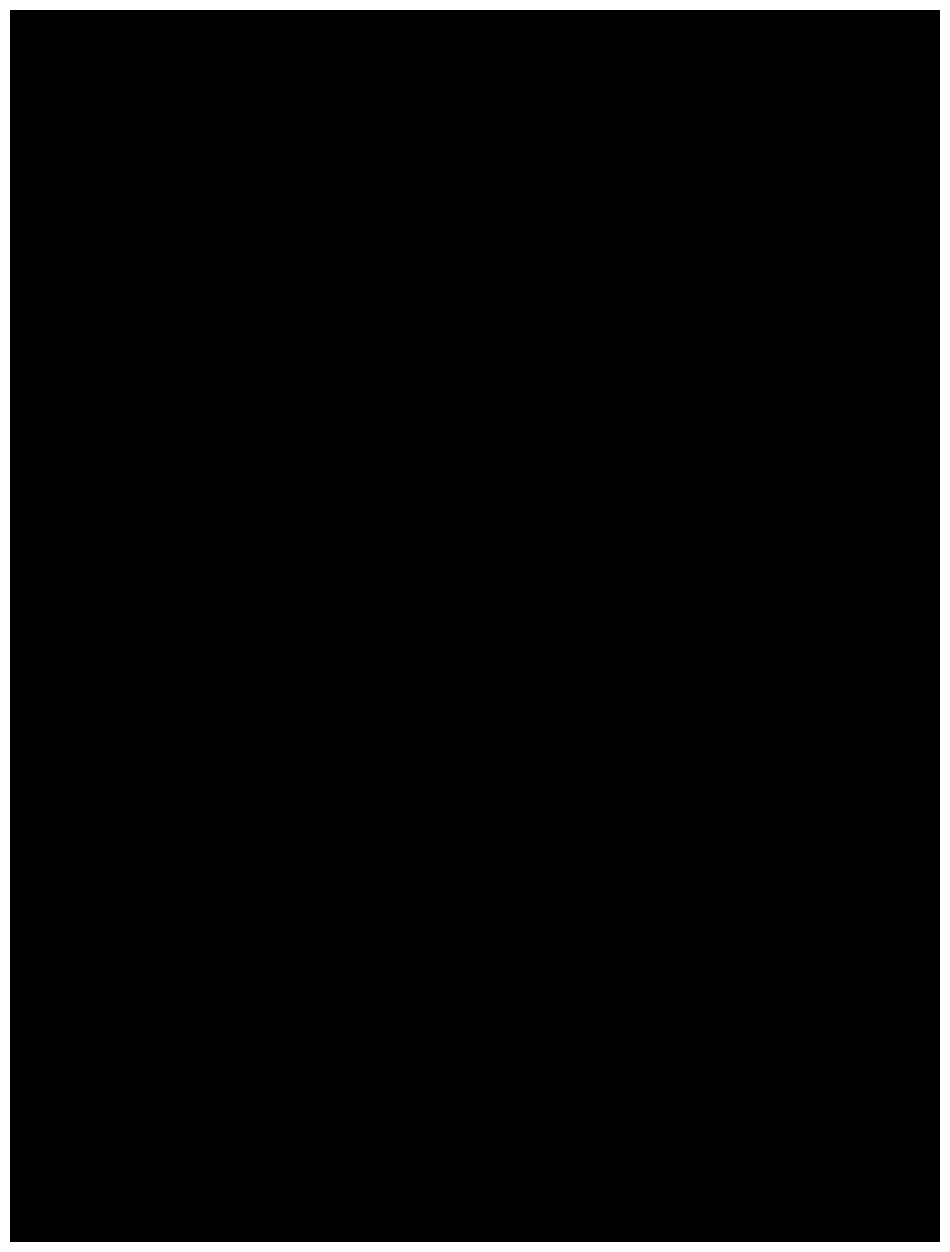

In [16]:
plot_numpy(img_i)

In [12]:
img_g = cv2.GaussianBlur(img, (5, 5), 0)

In [13]:
tr, img_i = cv2.threshold(img_g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [14]:
tr

69.0

8

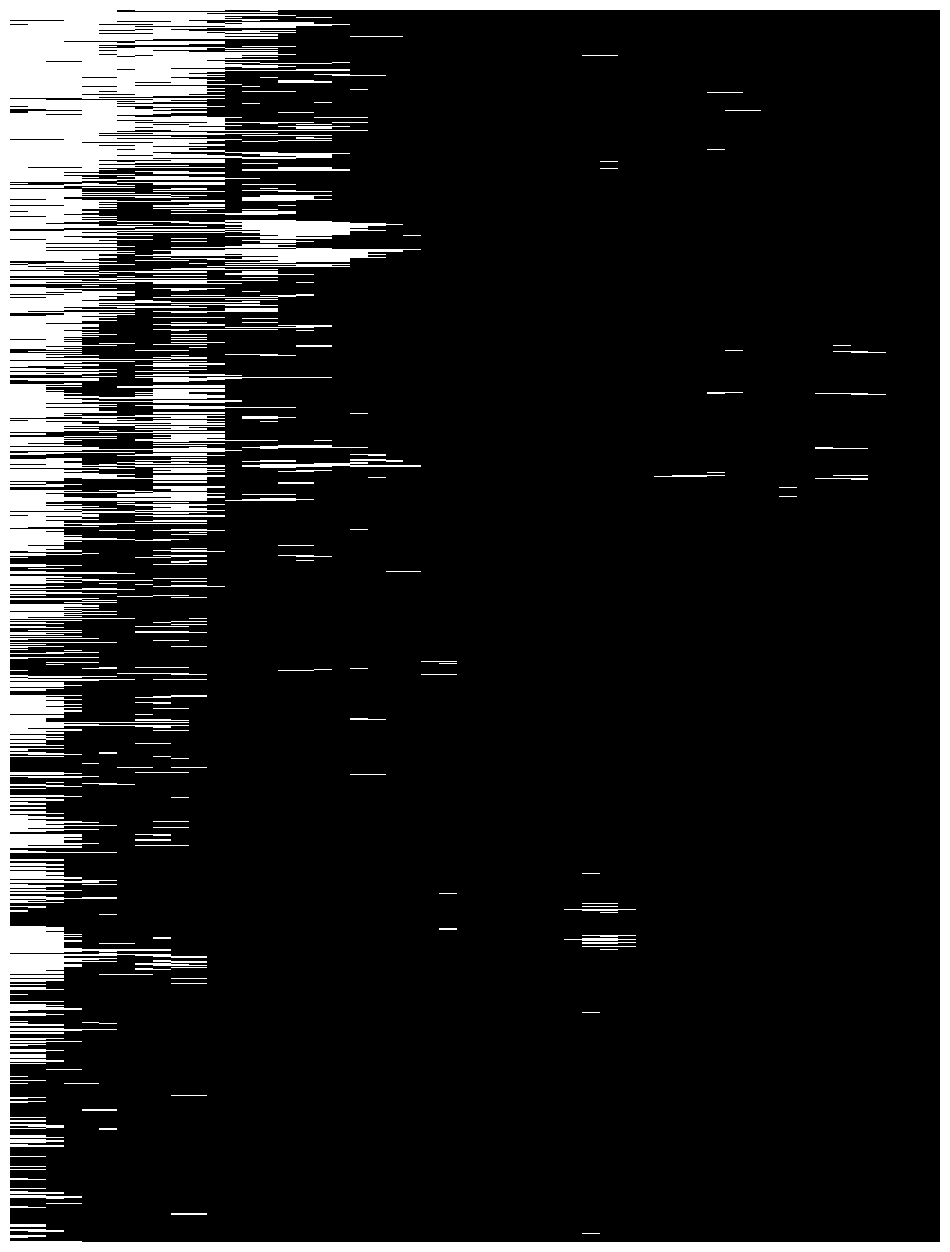

In [15]:
plot_numpy(img_i)

In [16]:
img_i = cv2.morphologyEx(
        img_i,
        cv2.MORPH_OPEN,
        cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)),
        iterations=1,
    )

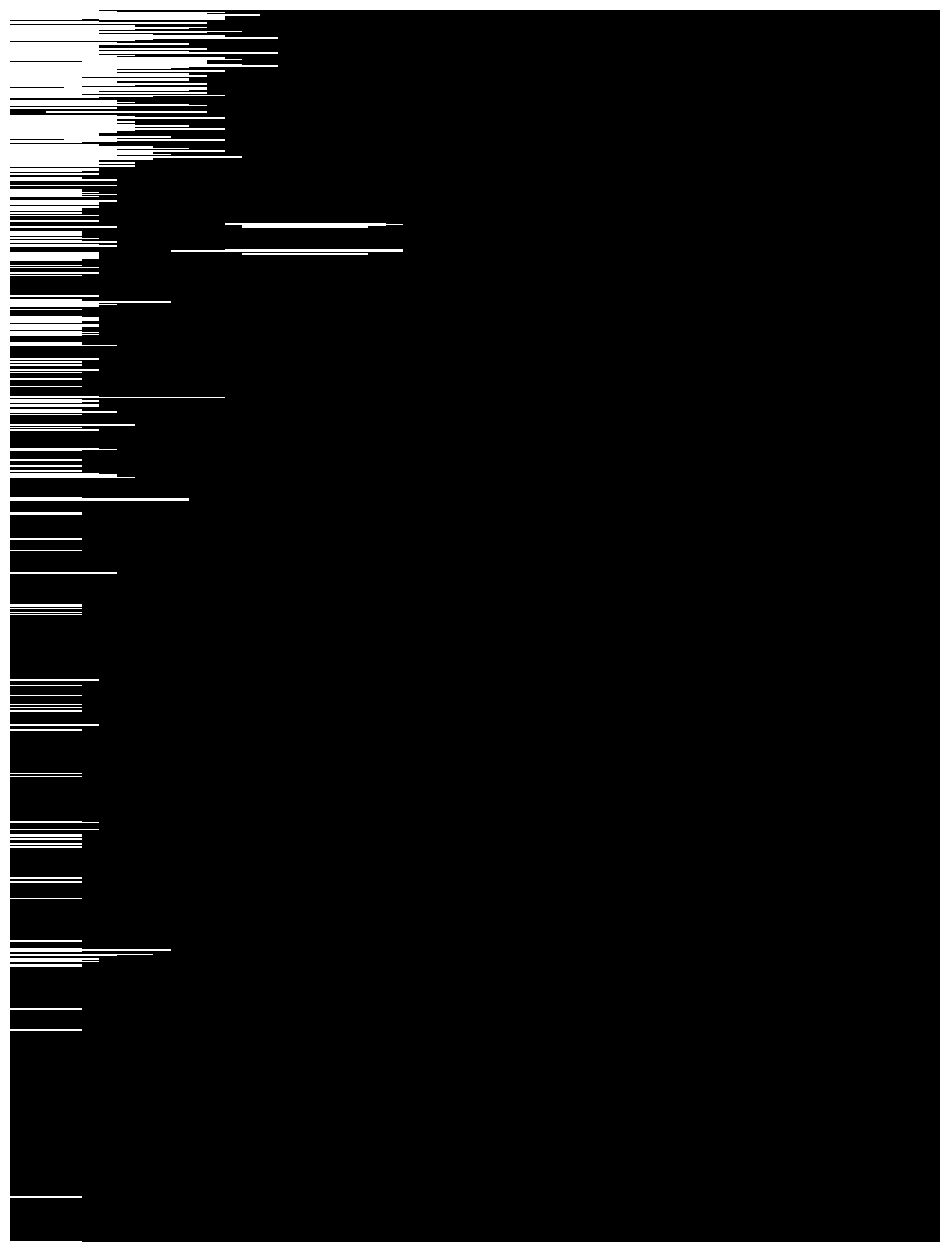

In [17]:
plot_numpy(img_i)

In [ ]:
from 

In [201]:
img_g = cv2.GaussianBlur(img, (11, 11), 0)

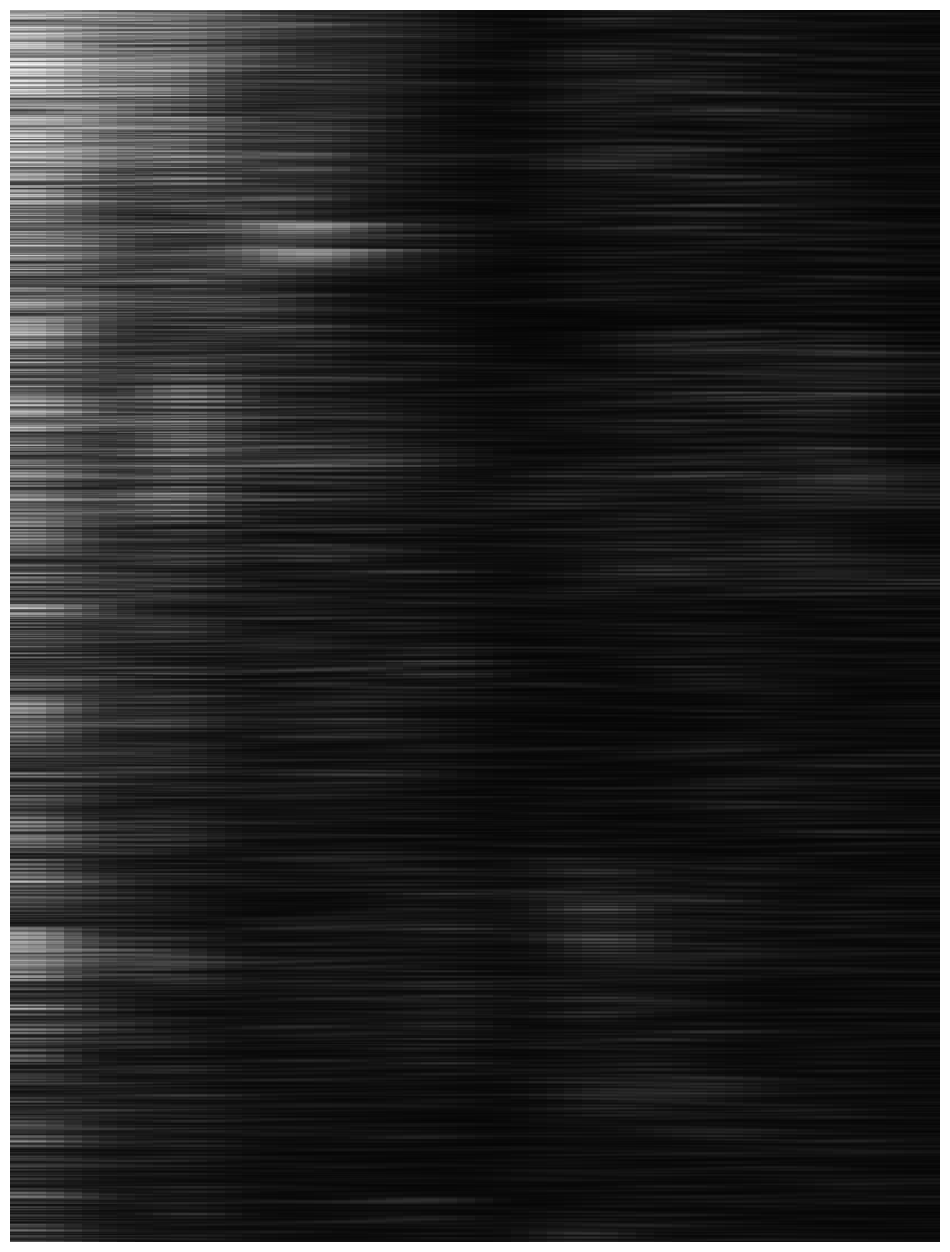

In [202]:
plot_numpy(img_g)

In [207]:
lines = cv2.HoughLinesP(
            img, # Input edge image
            1, # Distance resolution in pixels
            np.pi/250, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=100, # Min allowed length of line
            maxLineGap=50 # Max allowed gap between line for joining them
            )

52


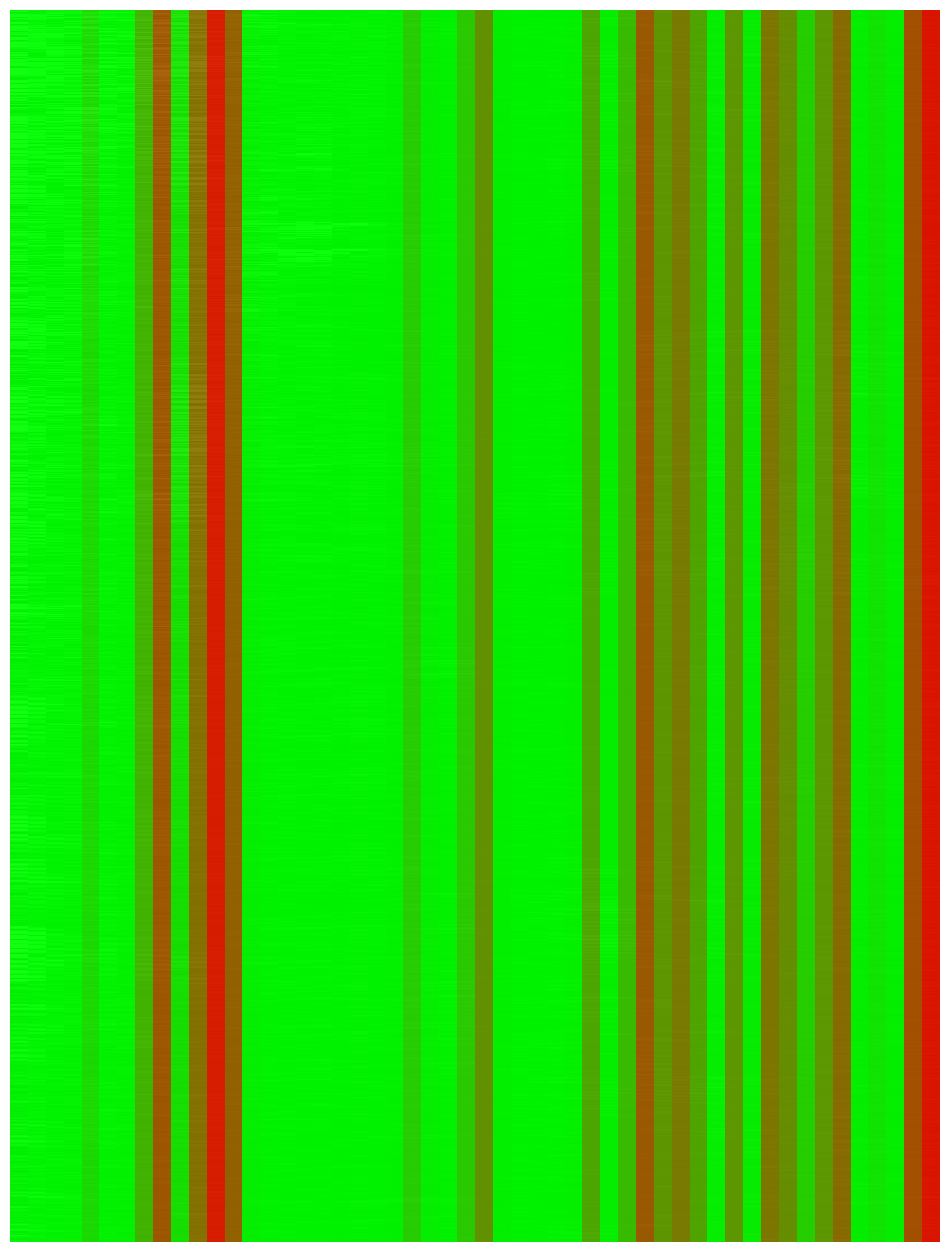

In [208]:
# lines = cv2.HoughLinesP(img_i, rho=1, theta=np.pi / 250, threshold=100, minLineLength = 100, maxLineGap=50)
lines_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

if lines is not None:
    print(len(lines))
    
    for i in range(0, len(lines)):
            l = lines[i][0]
            cv2.line(lines_dst, (l[0], l[1]), (l[2], l[3]), (255-i*10,i*10,0), 1, cv2.LINE_AA)

lines_dst.shape
plot_numpy(lines_dst)

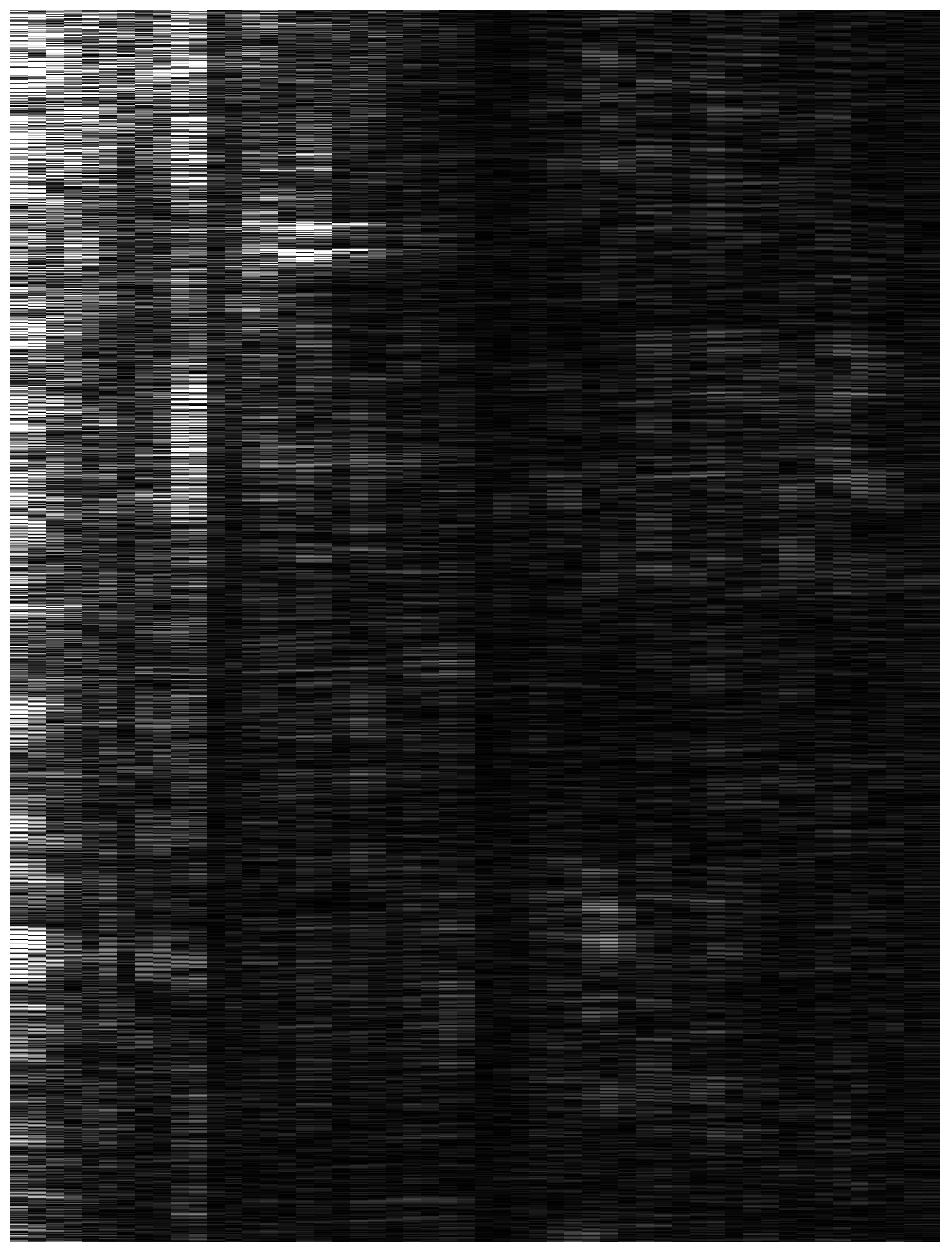

In [205]:
plot_numpy(img)

In [77]:
def get_mask(s, div):
    mask = np.zeros(s, np.float32)
    return cv2.circle(mask, (s[0] // 2, s[1] // 2), s[0] // div, 1, -1)


def fft(img, size=None):
    f = np.fft.fft2(img, size)
    fshift = np.fft.fftshift(f)
    spectrum = 20 * np.log(np.abs(fshift))
    return fshift, spectrum


def ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.real(img_back)

def showFreqAndImages(frequencies, images):
    fig, axes = plt.subplots(2, len(frequencies), figsize=(20, 10))
    for i, (freq, img) in enumerate(zip(frequencies, images)):
        axes[0, i].imshow(freq, cmap="gray", vmin=0, vmax=255)
        axes[1, i].imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()

In [78]:
img_grayscale = img

laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img_i = cv2.filter2D(img_grayscale, -1, laplacian)

m1 = get_mask(img_grayscale.shape, 2)
m2 = get_mask(img_grayscale.shape, 8)
m3 = get_mask(img_grayscale.shape, 32)

fshift, spectrum = fft(img_grayscale)

img_back_1 = ifft(fshift * m1)
img_back_2 = ifft(fshift * m2)
img_back_3 = ifft(fshift * m3)

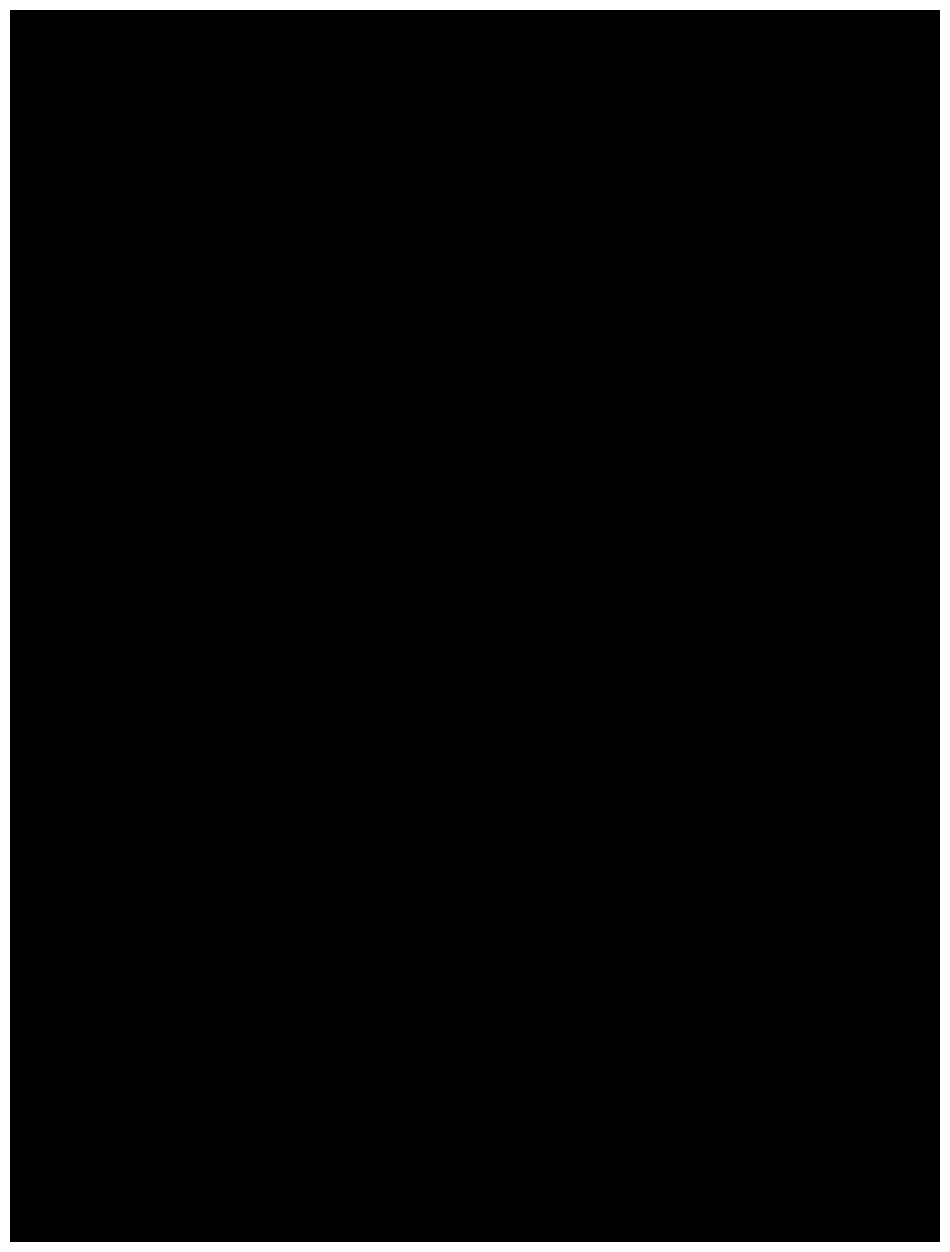

In [80]:
plot_numpy(img_back_3)

In [62]:
tr, img_i = cv2.threshold(img_i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [70]:
img_a = proper_opening(img_i)

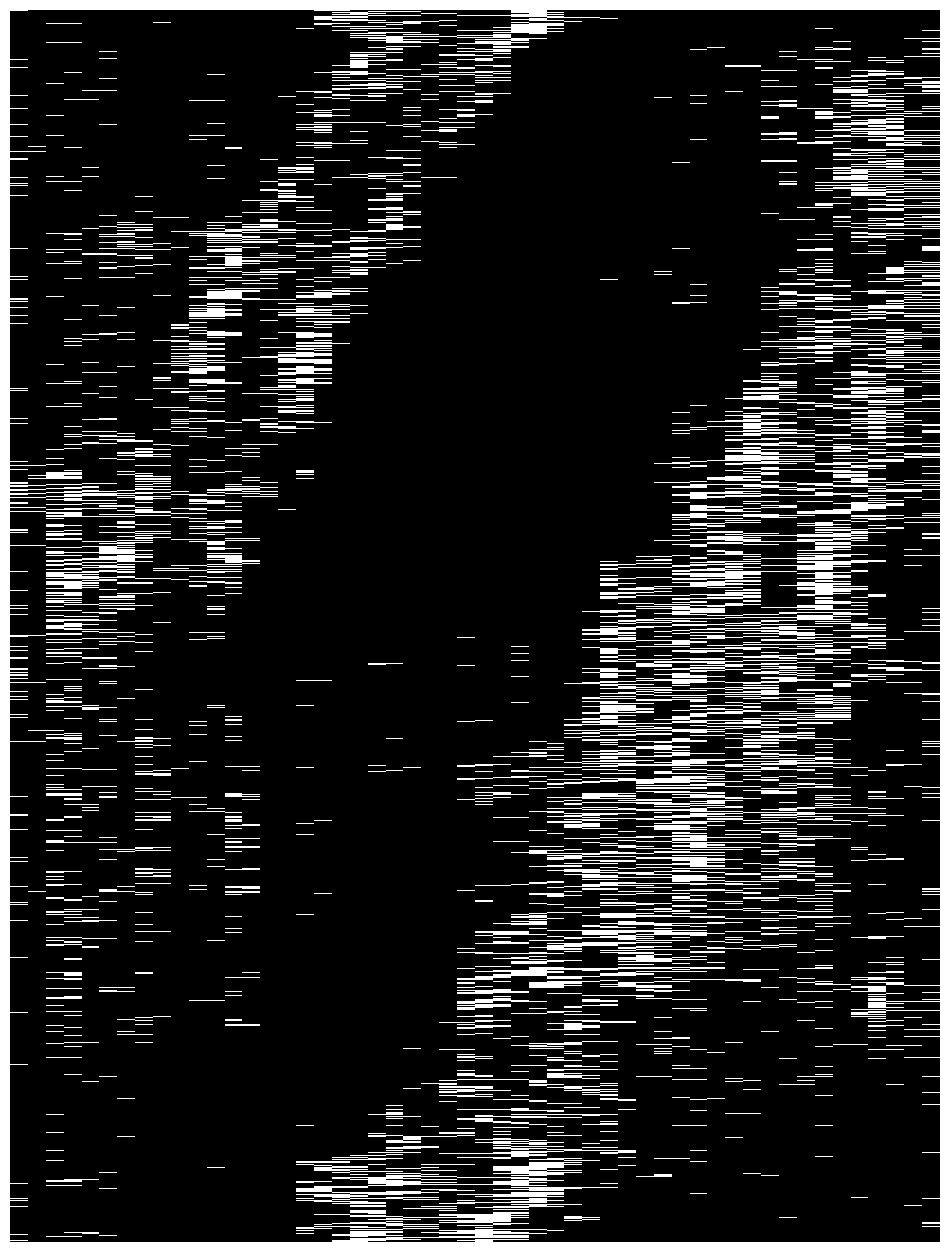

In [71]:
plot_numpy(img_i)